In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CardiacPatientData.csv to CardiacPatientData.csv


In [ ]:
# Cell 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the Dataset ---
# Make sure to upload 'CardiacPatientData.csv' to your Colab session storage first.
try:
    df = pd.read_csv('CardiacPatientData.csv')
    print("Dataset loaded successfully.")
    print(f"Original shape of dataset: {df.shape}")
except FileNotFoundError:
    print("ERROR: 'CardiacPatientData.csv' not found. Please upload it to Colab or check the path.")
    # If the file isn't found, the rest of the code will fail.
    # You might want to stop here if df is not loaded.
    # import sys
    # sys.exit()

# Make a copy to work on, preserving the original df
df_processed = df.copy()
print(f"Working copy 'df_processed' created with shape: {df_processed.shape}")

Dataset loaded successfully.
Original shape of dataset: (5906, 20)
Working copy 'df_processed' created with shape: (5906, 20)


In [ ]:
# Cell 2: Initial Data Exploration
print("\n--- Initial Data Exploration of df_processed ---")

print("\nFirst 5 rows:")
print(df_processed.head())

print("\nInfo (data types, non-null counts):")
df_processed.info()

print("\nDescriptive statistics for numerical columns:")
print(df_processed.describe())

print("\nMissing values per column (sorted):")
print(df_processed.isnull().sum().sort_values(ascending=False))

print("\nUnique values in 'Outcome' column (Target Variable):")
if 'Outcome' in df_processed.columns:
    print(df_processed['Outcome'].value_counts(dropna=False)) # dropna=False to see NaNs if any
else:
    print("'Outcome' column not found.")


--- Initial Data Exploration of df_processed ---

First 5 rows:
   ID  SBP  DBP  HR  RR  BT  SpO2  Age  Gender  GCS     Na    K     Cl  Urea  \
0   1  163   95  90  18  98    98   66       1   15  139.0  4.0  105.0  41.0   
1   1  134   85  85  15  98    98   66       1   15  139.0  4.0  105.0  41.0   
2   1  121   77  80  19  98    98   66       1   15  139.0  4.0  105.0  41.0   
3   1  103   78  70  16  98    98   66       1   15  139.0  4.0  105.0  41.0   
4   1   96   70  59  13  98    98   66       1   15  139.0  4.0  105.0  41.0   

   Ceratinine  Alcoholic  Smoke  FHCD  TriageScore  Outcome  
0        91.0        1.0    1.0   0.0          3.0        1  
1        91.0        1.0    1.0   0.0          3.0        1  
2        91.0        1.0    1.0   0.0          3.0        1  
3        91.0        1.0    1.0   0.0          3.0        1  
4        91.0        1.0    1.0   0.0          3.0        1  

Info (data types, non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [ ]:
# Cell 3: Handle Highly Missing Features (Drop Strategy)
print("\n--- Part 1: Handling Highly Missing Features ---")

# Based on your info: Urea, Creatinine, Cl, Na, K (50–55% missing)
cols_to_drop_high_missing = ['Urea', 'Creatinine', 'Cl', 'Na', 'K']

# Check which of these columns actually exist in df_processed before trying to drop
existing_cols_to_drop = [col for col in cols_to_drop_high_missing if col in df_processed.columns]

if existing_cols_to_drop:
    df_processed.drop(columns=existing_cols_to_drop, inplace=True)
    print(f"Dropped columns due to high missingness: {existing_cols_to_drop}")
else:
    print("No columns from 'cols_to_drop_high_missing' found in the DataFrame to drop.")

print(f"Shape of df_processed after dropping highly missing columns: {df_processed.shape}")
print("\nMissing values after dropping columns:")
print(df_processed.isnull().sum().sort_values(ascending=False))


--- Part 1: Handling Highly Missing Features ---
Dropped columns due to high missingness: ['Urea', 'Cl', 'Na', 'K']
Shape of df_processed after dropping highly missing columns: (5906, 16)

Missing values after dropping columns:
Ceratinine     3261
TriageScore    1903
Smoke          1752
Alcoholic      1751
FHCD           1621
ID                0
DBP               0
SBP               0
Age               0
SpO2              0
BT                0
RR                0
HR                0
GCS               0
Gender            0
Outcome           0
dtype: int64


In [ ]:
# Cell 4: Handle Moderately Missing Features (Impute)
print("\n--- Part 2: Handling Moderately Missing Features ---")
# TriageScore, Smoke, Alcoholic, FHCD (25–30% missing)

# TriageScore (assuming numeric, impute with median)
if 'TriageScore' in df_processed.columns:
    if df_processed['TriageScore'].isnull().sum() > 0: # Check if there are NaNs
        median_triage_score = df_processed['TriageScore'].median()
        df_processed['TriageScore'].fillna(median_triage_score, inplace=True)
        print(f"Imputed missing 'TriageScore' values with median: {median_triage_score:.2f}")
    else:
        print("'TriageScore' has no missing values to impute.")
else:
    print("'TriageScore' column not found.")

# Smoke, Alcoholic, FHCD (likely binary or categorical, impute with mode)
# First, let's inspect their current values and types if they exist
categorical_cols_to_impute_mode = ['Smoke', 'Alcoholic', 'FHCD']
for col in categorical_cols_to_impute_mode:
    if col in df_processed.columns:
        print(f"\nInspecting column: {col}")
        print(f"Data type: {df_processed[col].dtype}")
        print(f"Unique values (incl. NaN): {df_processed[col].unique()}") # See what's actually in there
        if df_processed[col].isnull().sum() > 0:
            mode_val = df_processed[col].mode()[0] # mode() can return multiple if ties, take first
            df_processed[col].fillna(mode_val, inplace=True)
            print(f"Imputed missing '{col}' values with mode: {mode_val}")
        else:
            print(f"'{col}' has no missing values to impute.")
    else:
        print(f"'{col}' column not found for imputation.")

print("\nMissing values after imputing moderately missing columns:")
print(df_processed.isnull().sum().sort_values(ascending=False))


--- Part 2: Handling Moderately Missing Features ---
Imputed missing 'TriageScore' values with median: 2.00

Inspecting column: Smoke
Data type: float64
Unique values (incl. NaN): [ 1.  0. nan]
Imputed missing 'Smoke' values with mode: 0.0

Inspecting column: Alcoholic
Data type: float64
Unique values (incl. NaN): [ 1.  0. nan]
Imputed missing 'Alcoholic' values with mode: 0.0

Inspecting column: FHCD
Data type: float64
Unique values (incl. NaN): [ 0.  1. nan]
Imputed missing 'FHCD' values with mode: 0.0

Missing values after imputing moderately missing columns:
Ceratinine     3261
ID                0
DBP               0
SBP               0
RR                0
BT                0
SpO2              0
HR                0
Age               0
Gender            0
GCS               0
Alcoholic         0
Smoke             0
FHCD              0
TriageScore       0
Outcome           0
dtype: int64


<ipython-input-5-a46335b9701a>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['TriageScore'].fillna(median_triage_score, inplace=True)
<ipython-input-5-a46335b9701a>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
# Cell 5: Impute Other Vitals (if Necessary)
print("\n--- Part 3: Imputing Other Vitals (if necessary) ---")
# You mentioned SBP has no missing. Let's check DBP, HR, RR, SpO2.
vitals_to_check_impute = ['DBP', 'HR', 'RR', 'SpO2']
for col in vitals_to_check_impute:
    if col in df_processed.columns:
        if df_processed[col].isnull().sum() > 0:
            median_val = df_processed[col].median()
            df_processed[col].fillna(median_val, inplace=True)
            print(f"Imputed missing '{col}' values with median: {median_val:.2f}")
        else:
            print(f"'{col}' has no missing values to impute.")
    else:
        print(f"'{col}' column not found for imputation.")

print("\nMissing values after all imputation steps:")
print(df_processed.isnull().sum().sort_values(ascending=False))
# Ideally, at this point, all or most columns intended for use should have 0 missing values.
# If any critical columns still have NaNs, you need to investigate why.


--- Part 3: Imputing Other Vitals (if necessary) ---
'DBP' has no missing values to impute.
'HR' has no missing values to impute.
'RR' has no missing values to impute.
'SpO2' has no missing values to impute.

Missing values after all imputation steps:
Ceratinine     3261
ID                0
DBP               0
SBP               0
RR                0
BT                0
SpO2              0
HR                0
Age               0
Gender            0
GCS               0
Alcoholic         0
Smoke             0
FHCD              0
TriageScore       0
Outcome           0
dtype: int64


In [ ]:
# Cell 6: Encode Categorical Features
print("\n--- Part 4: Encoding Categorical Features ---")

# Gender:
# We need to know its current format. Let's assume it could be strings like 'Male'/'Female' or 'M'/'F'.
# If it's already 0/1, this step might modify it slightly or can be skipped for Gender.
if 'Gender' in df_processed.columns:
    print(f"\nInspecting 'Gender' column before encoding:")
    print(f"Data type: {df_processed['Gender'].dtype}")
    print(f"Unique values: {df_processed['Gender'].unique()}")

    # If 'Gender' is object type (string) or has more than 2 unique values that are not already 0/1
    if df_processed['Gender'].dtype == 'object' or (df_processed['Gender'].nunique() > 2 and not all(item in [0,1] for item in df_processed['Gender'].unique() if pd.notna(item))):
        try:
            df_processed = pd.get_dummies(df_processed, columns=['Gender'], prefix='Gender', drop_first=True)
            print("Encoded 'Gender' using one-hot encoding (pd.get_dummies).")
        except Exception as e:
            print(f"Error encoding 'Gender': {e}")
    elif df_processed['Gender'].nunique() == 2:
        # If it's binary but not 0/1 (e.g., 1 and 2, or 'M' and 'F' which might not have been caught above)
        # Let's ensure it's 0 and 1. You might need to adjust the mapping.
        unique_genders = df_processed['Gender'].dropna().unique()
        if not all(item in [0,1] for item in unique_genders):
             # Example: map unique_genders[0] to 0 and unique_genders[1] to 1
             if len(unique_genders) == 2 : # Ensure there are exactly two for mapping
                print(f"Mapping binary 'Gender' values: {unique_genders[0]} to 0, {unique_genders[1]} to 1")
                gender_map = {unique_genders[0]: 0, unique_genders[1]: 1}
                df_processed['Gender'] = df_processed['Gender'].map(gender_map)
             else:
                print(f"'Gender' has {len(unique_genders)} unique values, but not 0/1. Manual review needed if not string.")
        else:
            print("'Gender' column appears to be already suitably binary (0/1).")
    else:
        print("'Gender' column is likely already numeric and suitable, or has only one unique value.")
else:
    print("'Gender' column not found.")


# Smoke, Alcoholic, FHCD:
# These were imputed with their mode. If their original type was string (e.g., "Yes", "No"),
# or if they are numbers but not 0/1 (e.g., 1, 2), they need encoding.
# If they were already 0/1 and imputed with 0 or 1, they are fine.
categorical_cols_to_encode = ['Smoke', 'Alcoholic', 'FHCD']
for col in categorical_cols_to_encode:
    if col in df_processed.columns:
        print(f"\nInspecting '{col}' column before potential encoding:")
        print(f"Data type: {df_processed[col].dtype}")
        print(f"Unique values: {df_processed[col].unique()}")

        # Check if encoding is needed (e.g., if it's object type or numeric but not 0/1)
        is_object_type = df_processed[col].dtype == 'object'
        is_numeric_not_binary = pd.api.types.is_numeric_dtype(df_processed[col].dtype) and \
                                not all(item in [0, 1] for item in df_processed[col].dropna().unique())

        if is_object_type or is_numeric_not_binary:
            try:
                df_processed = pd.get_dummies(df_processed, columns=[col], prefix=col, drop_first=True)
                print(f"Encoded '{col}' using one-hot encoding (pd.get_dummies).")
            except Exception as e:
                print(f"Error encoding '{col}': {e}")
        else:
            print(f"'{col}' column appears to be already suitably binary (0/1) or otherwise numeric and not needing one-hot encoding here.")
    else:
        print(f"'{col}' column not found for encoding.")

print("\n--- DataFrame columns after potential encoding ---")
print(df_processed.columns)
print("\nFirst 5 rows of df_processed after encoding:")
print(df_processed.head())
print(f"\nShape of df_processed after encoding: {df_processed.shape}")


--- Part 4: Encoding Categorical Features ---

Inspecting 'Gender' column before encoding:
Data type: int64
Unique values: [1 0]
'Gender' column appears to be already suitably binary (0/1).

Inspecting 'Smoke' column before potential encoding:
Data type: float64
Unique values: [1. 0.]
'Smoke' column appears to be already suitably binary (0/1) or otherwise numeric and not needing one-hot encoding here.

Inspecting 'Alcoholic' column before potential encoding:
Data type: float64
Unique values: [1. 0.]
'Alcoholic' column appears to be already suitably binary (0/1) or otherwise numeric and not needing one-hot encoding here.

Inspecting 'FHCD' column before potential encoding:
Data type: float64
Unique values: [0. 1.]
'FHCD' column appears to be already suitably binary (0/1) or otherwise numeric and not needing one-hot encoding here.

--- DataFrame columns after potential encoding ---
Index(['ID', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'SpO2', 'Age', 'Gender', 'GCS',
       'Ceratinine', 'Alcohol

In [ ]:
# Cell 6.1: Address 'Ceratinine' if it's the highly missing Creatinine
if 'Ceratinine' in df_processed.columns:
    print(f"\nMissing values in 'Ceratinine': {df_processed['Ceratinine'].isnull().sum()}")
    # If it's the one we intended to drop:
    print("Dropping 'Ceratinine' column as it was likely intended to be 'Creatinine' (highly missing).")
    df_processed.drop(columns=['Ceratinine'], inplace=True)
    print(f"Shape of df_processed after dropping 'Ceratinine': {df_processed.shape}")
else:
    print("'Ceratinine' column not found (already dropped or name is different).")

print("\nMissing values after potentially dropping 'Ceratinine':")
print(df_processed.isnull().sum().sort_values(ascending=False))


Missing values in 'Ceratinine': 3261
Dropping 'Ceratinine' column as it was likely intended to be 'Creatinine' (highly missing).
Shape of df_processed after dropping 'Ceratinine': (5906, 15)

Missing values after potentially dropping 'Ceratinine':
ID             0
SBP            0
DBP            0
HR             0
RR             0
BT             0
SpO2           0
Age            0
Gender         0
GCS            0
Alcoholic      0
Smoke          0
FHCD           0
TriageScore    0
Outcome        0
dtype: int64


In [ ]:
# Cell 7: Feature Engineering
print("\n--- Part 5: Feature Engineering ---")

# 1. Pulse Pressure (SBP - DBP)
if 'SBP' in df_processed.columns and 'DBP' in df_processed.columns:
    df_processed['PulsePressure'] = df_processed['SBP'] - df_processed['DBP']
    print("Created 'PulsePressure' feature.")
else:
    print("Could not create 'PulsePressure' as SBP or DBP is missing from df_processed.")

# 2. Mean Arterial Pressure (MAP)
# MAP = DBP + 1/3 * (SBP - DBP)  OR MAP = (SBP + 2*DBP) / 3
# Both are common, the second is often more precise with direct SBP/DBP.
if 'SBP' in df_processed.columns and 'DBP' in df_processed.columns:
    df_processed['MAP'] = (df_processed['SBP'] + 2 * df_processed['DBP']) / 3
    print("Created 'MAP' feature.")
else:
    print("Could not create 'MAP' as SBP or DBP is missing from df_processed.")

# 3. Age Group (Example - adjust bins and labels as needed for your elderly dataset context)
# Since this is an elderly dataset, the bins might reflect that.
if 'Age' in df_processed.columns:
    # Example bins for an elderly focused dataset:
    # You might adjust these based on the actual age distribution from df_processed['Age'].describe()
    min_age = df_processed['Age'].min()
    max_age = df_processed['Age'].max()
    # A simple split: <65, 65-74, 75-84, 85+
    # Ensure bins cover the full range
    age_bins = [min_age -1, 65, 75, 85, max_age + 1] # -1 and +1 to ensure all ages are covered
    age_labels = ['Age_Under65', 'Age_65-74', 'Age_75-84', 'Age_85+']

    # Check if min_age itself makes some bins invalid (e.g. if all patients are >65)
    # Adjust bins if necessary based on actual age distribution
    # For example, if min_age is 60:
    # age_bins = [59, 70, 80, max_age + 1]
    # age_labels = ['Age_60-69', 'Age_70-79', 'Age_80+']

    print(f"Age range in dataset: Min={min_age}, Max={max_age}")
    # For now, using a general set of bins. Review if these make sense for your data.
    # Let's use a simpler set of bins if the data is primarily elderly
    if min_age >= 60: # Example condition
         age_bins = [min_age-1, 70, 80, max_age + 1]
         age_labels = [f'Age_{int(min_age)}-69', 'Age_70-79', 'Age_80+']
         # Ensure there are at least two bins.
         if len(age_labels) < 2 : # If max_age is also low, this could happen
            age_bins = [min_age-1, max_age+1]
            age_labels = [f'Age_{int(min_age)}-{int(max_age)}']


    df_processed['AgeGroup'] = pd.cut(df_processed['Age'],
                                      bins=age_bins,
                                      labels=age_labels,
                                      right=False) # right=False means [start, end)

    # One-hot encode the new 'AgeGroup' column
    df_processed = pd.get_dummies(df_processed, columns=['AgeGroup'], prefix='AgeGroup', drop_first=True)
    print("Created and one-hot encoded 'AgeGroup' feature.")
else:
    print("'Age' column not found for creating AgeGroup.")


print("\nFirst 5 rows of df_processed after feature engineering:")
print(df_processed.head())
print(f"\nShape of df_processed after feature engineering: {df_processed.shape}")
print("\nColumns after feature engineering:")
print(df_processed.columns)


--- Part 5: Feature Engineering ---
Created 'PulsePressure' feature.
Created 'MAP' feature.
Age range in dataset: Min=15, Max=89
Created and one-hot encoded 'AgeGroup' feature.

First 5 rows of df_processed after feature engineering:
   ID  SBP  DBP  HR  RR  BT  SpO2  Age  Gender  GCS  Alcoholic  Smoke  FHCD  \
0   1  163   95  90  18  98    98   66       1   15        1.0    1.0   0.0   
1   1  134   85  85  15  98    98   66       1   15        1.0    1.0   0.0   
2   1  121   77  80  19  98    98   66       1   15        1.0    1.0   0.0   
3   1  103   78  70  16  98    98   66       1   15        1.0    1.0   0.0   
4   1   96   70  59  13  98    98   66       1   15        1.0    1.0   0.0   

   TriageScore  Outcome  PulsePressure         MAP  AgeGroup_Age_65-74  \
0          3.0        1             68  117.666667                True   
1          3.0        1             49  101.333333                True   
2          3.0        1             44   91.666667                Tr

In [ ]:
# Cell 7.1: Check BT missing values
if 'BT' in df_processed.columns:
    print(f"Missing values in 'BT': {df_processed['BT'].isnull().sum()}")
    # If it has missing values, you need to impute it, e.g.:
    # if df_processed['BT'].isnull().sum() > 0:
    #     df_processed['BT'].fillna(df_processed['BT'].median(), inplace=True)
    #     print("Imputed 'BT' with its median.")
else:
    print("'BT' column not found.")

Missing values in 'BT': 0


In [ ]:
# Cell 8: Define Target Variable (y) and Features (X)
print("\n--- Part 6a: Defining Target (y) and Features (X) ---")

if 'Outcome' in df_processed.columns:
    y = df_processed['Outcome'].copy() # Target variable

    # Features (X): Drop the outcome variable and any identifier columns like 'ID'
    columns_to_drop_for_X = ['Outcome']
    if 'ID' in df_processed.columns:
        columns_to_drop_for_X.append('ID')

    X = df_processed.drop(columns=columns_to_drop_for_X)

    print(f"Target variable 'y' created. Shape: {y.shape}")
    print(f"Unique values in y: {y.unique()}")
    # Ensure y is numeric (0 and 1). If it's string, it needs mapping.
    # Example: if y.dtype == 'object': y = y.map({'Survived':0, 'Died':1})
    # Based on your previous output, 'Outcome' looks like it's already 0/1 int/float.

    print(f"\nFeatures 'X' created. Shape: {X.shape}")
    print("First 5 rows of X:")
    print(X.head())
    print("\nColumns in X:")
    print(X.columns)
else:
    print("ERROR: 'Outcome' column not found in df_processed. Cannot separate X and y.")
    # Handle error, perhaps by stopping execution if X and y are critical for next steps
    # import sys
    # sys.exit()


--- Part 6a: Defining Target (y) and Features (X) ---
Target variable 'y' created. Shape: (5906,)
Unique values in y: [1 0]

Features 'X' created. Shape: (5906, 18)
First 5 rows of X:
   SBP  DBP  HR  RR  BT  SpO2  Age  Gender  GCS  Alcoholic  Smoke  FHCD  \
0  163   95  90  18  98    98   66       1   15        1.0    1.0   0.0   
1  134   85  85  15  98    98   66       1   15        1.0    1.0   0.0   
2  121   77  80  19  98    98   66       1   15        1.0    1.0   0.0   
3  103   78  70  16  98    98   66       1   15        1.0    1.0   0.0   
4   96   70  59  13  98    98   66       1   15        1.0    1.0   0.0   

   TriageScore  PulsePressure         MAP  AgeGroup_Age_65-74  \
0          3.0             68  117.666667                True   
1          3.0             49  101.333333                True   
2          3.0             44   91.666667                True   
3          3.0             25   86.333333                True   
4          3.0             26   78.6666

In [ ]:
# Cell 9: Split Data into Training and Testing Sets
print("\n--- Part 6b: Splitting Data into Training and Testing Sets ---")
from sklearn.model_selection import train_test_split

if 'X' in locals() and 'y' in locals(): # Check if X and y were successfully created
    # Determine if stratification is possible and desirable
    stratify_option = None
    if y.nunique() > 1 : # Check if target has more than one class for stratification
        # Check if there are enough samples in the smallest class for the split
        # A common rule of thumb for stratify is at least 2 samples per class in test, or an error can occur
        # For a test_size of 0.25, value_counts should be at least 1 / 0.25 = 4 for the smallest class.
        # More simply, ensure at least 2 samples per class overall.
        if all(count >= 2 for count in y.value_counts()): # Check if each class has at least 2 samples
             stratify_option = y
        else:
            print("Warning: Smallest class in 'y' has fewer than 2 samples. Stratification disabled.")


    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.25,     # Using 25% for the test set
        random_state=42,    # Ensures reproducibility of the split
        stratify=stratify_option  # Stratify by y to maintain class proportions, if possible
    )

    print("Data split into training and testing sets.")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

    print("\nDistribution of target variable in training set (y_train):")
    print(y_train.value_counts(normalize=True))
    print("\nDistribution of target variable in testing set (y_test):")
    print(y_test.value_counts(normalize=True))
else:
    print("X or y was not defined in the previous step. Skipping train-test split.")


--- Part 6b: Splitting Data into Training and Testing Sets ---
Data split into training and testing sets.
X_train shape: (4429, 18), y_train shape: (4429,)
X_test shape: (1477, 18), y_test shape: (1477,)

Distribution of target variable in training set (y_train):
Outcome
1    0.855498
0    0.144502
Name: proportion, dtype: float64

Distribution of target variable in testing set (y_test):
Outcome
1    0.855789
0    0.144211
Name: proportion, dtype: float64


In [ ]:
# Cell 10: Feature Scaling
print("\n--- Part 7: Feature Scaling ---")
from sklearn.preprocessing import StandardScaler

# Check if X_train and X_test were successfully created in the previous step
if 'X_train' in locals() and 'X_test' in locals():
    scaler = StandardScaler()

    # Identify numerical columns to scale.
    # We want to scale original numerical features and engineered numerical features like PulsePressure, MAP.
    # We generally AVOID scaling columns that are already binary (0/1) as a result of one-hot encoding
    # (e.g., AgeGroup_..., Gender if it was 0/1, Smoke if 0/1 etc.) because scaling doesn't
    # add value and can make them harder to interpret, though it usually doesn't break models.

    # Let's select columns that are not the result of pd.get_dummies for AgeGroup
    # and are not already simple binary 0/1 features like Gender, Smoke, etc.
    # Essentially, we want to scale: SBP, DBP, HR, RR, BT, SpO2, Age, GCS, TriageScore, PulsePressure, MAP

    # A more explicit way to define columns for scaling:
    cols_to_scale = ['SBP', 'DBP', 'HR', 'RR', 'BT', 'SpO2', 'Age', 'GCS', 'TriageScore', 'PulsePressure', 'MAP']

    # Verify these columns exist in X_train before trying to scale
    actual_cols_to_scale = [col for col in cols_to_scale if col in X_train.columns]
    print(f"Columns identified for scaling: {actual_cols_to_scale}")

    if actual_cols_to_scale:
        # Create copies to keep the original X_train and X_test if needed
        X_train_scaled = X_train.copy()
        X_test_scaled = X_test.copy()

        # Fit the scaler on the TRAINING data only
        scaler.fit(X_train[actual_cols_to_scale])

        # Transform both TRAINING and TESTING data using the fitted scaler
        X_train_scaled[actual_cols_to_scale] = scaler.transform(X_train[actual_cols_to_scale])
        X_test_scaled[actual_cols_to_scale] = scaler.transform(X_test[actual_cols_to_scale])

        print("\nApplied StandardScaler to the identified numerical features.")
        print("First 5 rows of X_train_scaled:")
        print(X_train_scaled.head())

        print("\nDescriptive statistics of scaled features in X_train_scaled (should have mean ~0, std ~1):")
        print(X_train_scaled[actual_cols_to_scale].describe().loc[['mean', 'std']])

    else:
        print("No columns were identified or found for scaling. Using unscaled data.")
        X_train_scaled = X_train.copy() # Still define these variables for consistency
        X_test_scaled = X_test.copy()
else:
    print("X_train and/or X_test are not defined. Skipping feature scaling.")


print("\n--- Preprocessing and Feature Engineering Complete ---")
if 'X_train_scaled' in locals():
    print("You should now have:")
    print(f"- X_train_scaled (shape: {X_train_scaled.shape})")
    print(f"- X_test_scaled (shape: {X_test_scaled.shape})")
    print(f"- y_train (shape: {y_train.shape})")
    print(f"- y_test (shape: {y_test.shape})")

    print(f"\nTotal NaNs in X_train_scaled: {X_train_scaled.isnull().sum().sum()}")
    print(f"Total NaNs in X_test_scaled: {X_test_scaled.isnull().sum().sum()}")
else:
    print("Scaled dataframes (X_train_scaled, X_test_scaled) were not created.")


--- Part 7: Feature Scaling ---
Columns identified for scaling: ['SBP', 'DBP', 'HR', 'RR', 'BT', 'SpO2', 'Age', 'GCS', 'TriageScore', 'PulsePressure', 'MAP']

Applied StandardScaler to the identified numerical features.
First 5 rows of X_train_scaled:
           SBP       DBP        HR        RR        BT      SpO2       Age  \
1595  0.973779  1.063826  0.849169  0.087114 -0.359393  0.106104 -1.122759   
5193 -0.440044 -0.028612  2.146405  1.124281  1.470206  0.368345  0.852355   
4072 -0.148963  0.235080  0.567161  0.951420 -0.359393  0.106104 -0.039632   
5641 -0.606376  0.197410  0.510760 -0.258609 -0.359393 -0.680618 -0.039632   
1630 -0.731125 -0.103953  0.961972 -0.950054 -0.359393  0.106104 -1.122759   

      Gender       GCS  Alcoholic  Smoke  FHCD  TriageScore  PulsePressure  \
1595       1 -0.090013        0.0    0.0   0.0     1.485269      -0.165817   
5193       1 -0.090013        0.0    0.0   0.0    -0.495537      -0.337728   
4072       1 -0.090013        0.0    0.0   0

In [ ]:
# Cell 11: (Optional - if starting a new session or for clarity)
# This assumes X_train_scaled, X_test_scaled, y_train, y_test are already defined
# from your Week 2 work. If not, you'd need to re-run the preprocessing code
# or load them from saved files.

# For now, let's assume they are in memory from the previous cells.
print("--- Confirming Data for Model Development ---")
if 'X_train_scaled' in locals() and 'X_test_scaled' in locals() and \
   'y_train' in locals() and 'y_test' in locals():
    print(f"X_train_scaled shape: {X_train_scaled.shape}")
    print(f"X_test_scaled shape: {X_test_scaled.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")
    print("Data is ready.")
else:
    print("ERROR: Training/testing data not found. Please run preprocessing steps first.")
    # import sys
    # sys.exit() # Stop if data isn't ready

# Import common modeling and evaluation tools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

--- Confirming Data for Model Development ---
X_train_scaled shape: (4429, 18)
X_test_scaled shape: (1477, 18)
y_train shape: (4429,)
y_test shape: (1477,)
Data is ready.



--- Model 1: Logistic Regression ---
Logistic Regression model trained.

Logistic Regression - Evaluation:
Accuracy: 0.8646
Precision: 0.9801
Recall (Sensitivity): 0.8592
F1-Score: 0.9157
ROC AUC Score: 0.9526

Confusion Matrix (Logistic Regression):


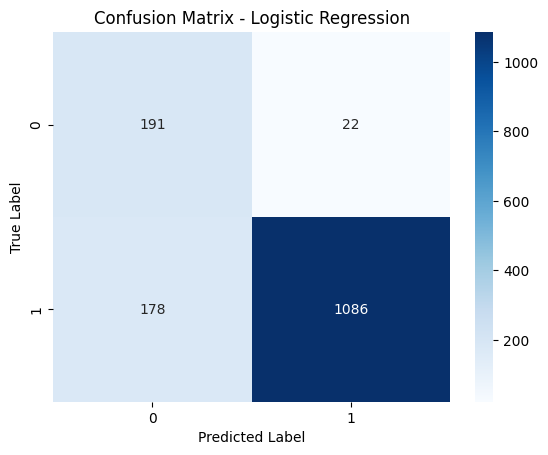


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.52      0.90      0.66       213
           1       0.98      0.86      0.92      1264

    accuracy                           0.86      1477
   macro avg       0.75      0.88      0.79      1477
weighted avg       0.91      0.86      0.88      1477



In [ ]:
# Cell 12: Logistic Regression Model
print("\n--- Model 1: Logistic Regression ---")

# Initialize the model
# class_weight='balanced' can help with imbalanced datasets by adjusting weights inversely
# proportional to class frequencies.
log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000) # Increased max_iter for convergence

# Train the model
log_reg.fit(X_train_scaled, y_train)
print("Logistic Regression model trained.")

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_proba_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1] # Probabilities for the positive class (Outcome 1)

# Evaluate the model
print("\nLogistic Regression - Evaluation:")
accuracy_lr = accuracy_score(y_test, y_pred_log_reg)
precision_lr = precision_score(y_test, y_pred_log_reg)
recall_lr = recall_score(y_test, y_pred_log_reg)
f1_lr = f1_score(y_test, y_pred_log_reg)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_log_reg)

print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}") # How many of the predicted positives were actual positives
print(f"Recall (Sensitivity): {recall_lr:.4f}") # How many of the actual positives were correctly identified
print(f"F1-Score: {f1_lr:.4f}") # Harmonic mean of precision and recall
print(f"ROC AUC Score: {roc_auc_lr:.4f}")

print("\nConfusion Matrix (Logistic Regression):")
cm_lr = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log_reg))


--- Model 2: Decision Tree Classifier ---
Decision Tree model trained.

Decision Tree - Evaluation:
Accuracy: 0.9655
Precision: 0.9848
Recall (Sensitivity): 0.9747
F1-Score: 0.9797
ROC AUC Score: 0.9748

Confusion Matrix (Decision Tree):


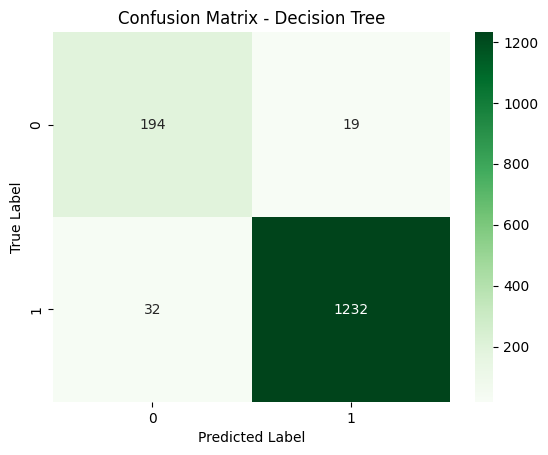


Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       213
           1       0.98      0.97      0.98      1264

    accuracy                           0.97      1477
   macro avg       0.92      0.94      0.93      1477
weighted avg       0.97      0.97      0.97      1477


Feature Importances (Decision Tree):
Age              0.285584
HR               0.280642
SpO2             0.171761
FHCD             0.081648
TriageScore      0.058547
MAP              0.024903
SBP              0.023072
Smoke            0.018081
BT               0.016011
PulsePressure    0.013367
dtype: float64


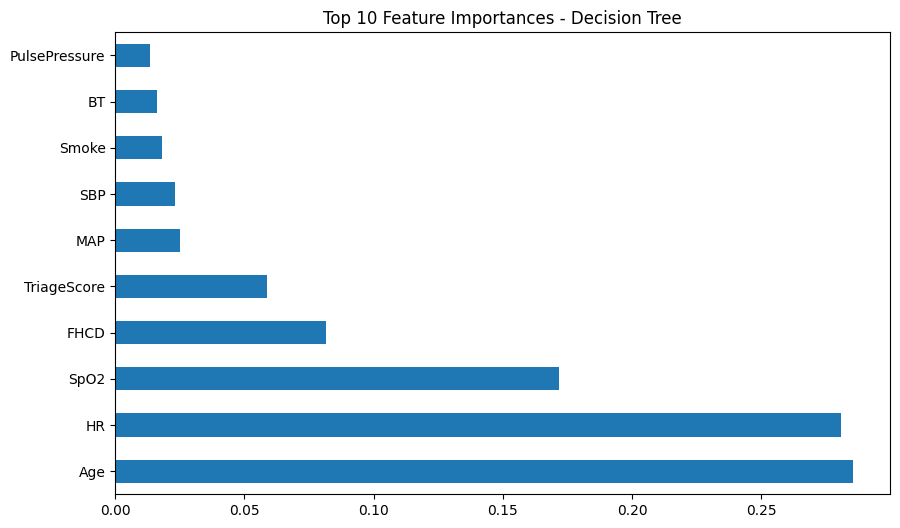

In [ ]:
# Cell 13: Decision Tree Classifier
print("\n--- Model 2: Decision Tree Classifier ---")

# Initialize the model
# class_weight='balanced' can also be useful here.
# max_depth can be tuned to prevent overfitting; let's start with a reasonable default or None.
dt_clf = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=10) # Added max_depth to control complexity

# Train the model
dt_clf.fit(X_train_scaled, y_train)
print("Decision Tree model trained.")

# Make predictions
y_pred_dt = dt_clf.predict(X_test_scaled)
y_pred_proba_dt = dt_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("\nDecision Tree - Evaluation:")
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall (Sensitivity): {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print(f"ROC AUC Score: {roc_auc_dt:.4f}")

print("\nConfusion Matrix (Decision Tree):")
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens') # Using a different colormap
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

# Feature Importances (for tree-based models)
print("\nFeature Importances (Decision Tree):")
importances_dt = pd.Series(dt_clf.feature_importances_, index=X_train_scaled.columns)
importances_dt_sorted = importances_dt.sort_values(ascending=False)
print(importances_dt_sorted.head(10)) # Print top 10

plt.figure(figsize=(10, 6))
importances_dt_sorted.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances - Decision Tree')
plt.show()


--- Model 3: Random Forest Classifier ---
Random Forest model trained.

Random Forest - Evaluation:
Accuracy: 0.9824
Precision: 0.9882
Recall (Sensitivity): 0.9913
F1-Score: 0.9897
ROC AUC Score: 0.9979

Confusion Matrix (Random Forest):


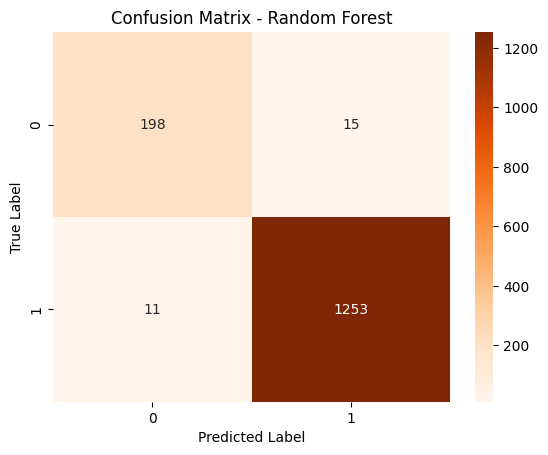


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       213
           1       0.99      0.99      0.99      1264

    accuracy                           0.98      1477
   macro avg       0.97      0.96      0.96      1477
weighted avg       0.98      0.98      0.98      1477


Feature Importances (Random Forest):
HR               0.226800
Age              0.173134
SpO2             0.161832
TriageScore      0.065804
FHCD             0.054541
RR               0.054530
PulsePressure    0.053034
SBP              0.047999
MAP              0.038908
Smoke            0.025099
dtype: float64


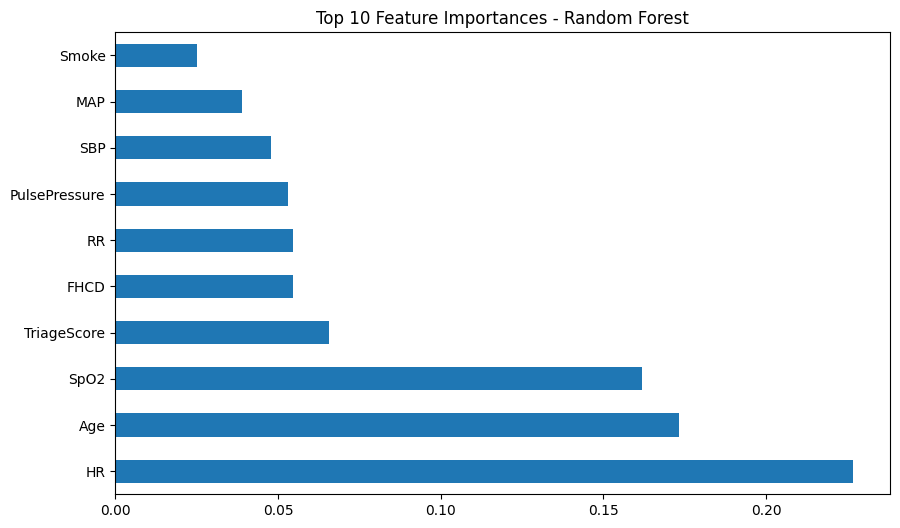

In [ ]:
# Cell 14: Random Forest Classifier
print("\n--- Model 3: Random Forest Classifier ---")

# Initialize the model
# n_estimators: number of trees in the forest
# class_weight='balanced' or 'balanced_subsample' can be used
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=10, n_jobs=-1)
# Using n_jobs=-1 will use all available processor cores for faster training.
# max_depth is kept similar to the single Decision Tree for a fair comparison initially.

# Train the model
rf_clf.fit(X_train_scaled, y_train)
print("Random Forest model trained.")

# Make predictions
y_pred_rf = rf_clf.predict(X_test_scaled)
y_pred_proba_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("\nRandom Forest - Evaluation:")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall (Sensitivity): {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")

print("\nConfusion Matrix (Random Forest):")
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges') # Different colormap
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Feature Importances
print("\nFeature Importances (Random Forest):")
importances_rf = pd.Series(rf_clf.feature_importances_, index=X_train_scaled.columns)
importances_rf_sorted = importances_rf.sort_values(ascending=False)
print(importances_rf_sorted.head(10))

plt.figure(figsize=(10, 6))
importances_rf_sorted.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances - Random Forest')
plt.show()


--- Model 4: Gradient Boosting Classifier ---
Gradient Boosting model trained.

Gradient Boosting - Evaluation:
Accuracy: 0.9919
Precision (Class 1): 0.9937
Recall (Sensitivity, Class 1): 0.9968
F1-Score (Class 1): 0.9953
ROC AUC Score: 0.9992

Confusion Matrix (Gradient Boosting):


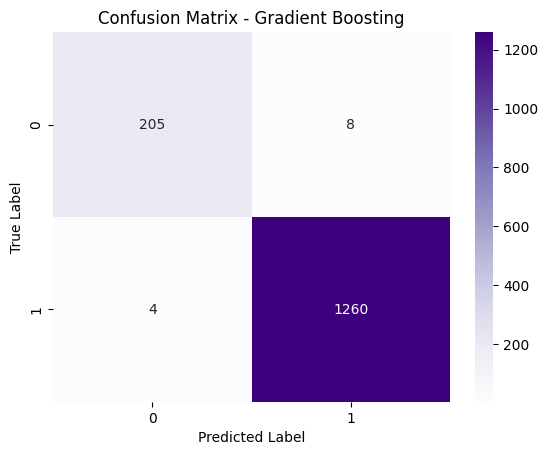


Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       213
           1       0.99      1.00      1.00      1264

    accuracy                           0.99      1477
   macro avg       0.99      0.98      0.98      1477
weighted avg       0.99      0.99      0.99      1477


Feature Importances (Gradient Boosting):
SpO2             0.329062
Age              0.201455
HR               0.153234
FHCD             0.130676
TriageScore      0.047199
SBP              0.025740
PulsePressure    0.022957
RR               0.021503
Smoke            0.018944
MAP              0.018501
dtype: float64


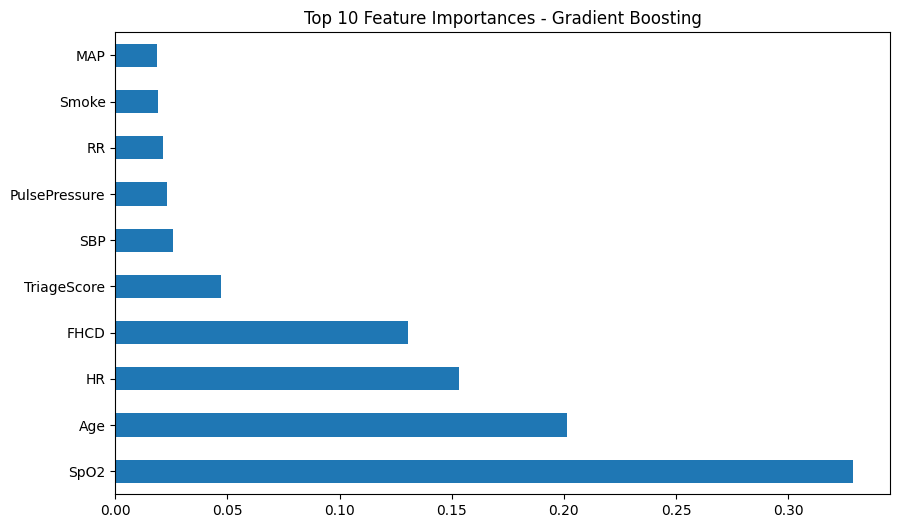

In [ ]:
# Cell 15: Gradient Boosting Classifier
print("\n--- Model 4: Gradient Boosting Classifier ---")

# Initialize the model
# n_estimators: number of boosting stages (trees)
# learning_rate: shrinks the contribution of each tree
# max_depth: limits the depth of individual trees
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
# Note: Gradient Boosting in scikit-learn doesn't have a direct 'class_weight' param like RF/DT.
# Handling imbalance might require other techniques if this model underperforms on minority class
# (e.g., SMOTE on training data, or adjusting sample_weight if supported and understood).
# For now, let's see its raw performance. Max_depth is often kept smaller in GBTs.

# Train the model
gb_clf.fit(X_train_scaled, y_train)
print("Gradient Boosting model trained.")

# Make predictions
y_pred_gb = gb_clf.predict(X_test_scaled)
y_pred_proba_gb = gb_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("\nGradient Boosting - Evaluation:")
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb) # for class 1
recall_gb = recall_score(y_test, y_pred_gb)       # for class 1
f1_gb = f1_score(y_test, y_pred_gb)               # for class 1
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)

print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision (Class 1): {precision_gb:.4f}")
print(f"Recall (Sensitivity, Class 1): {recall_gb:.4f}")
print(f"F1-Score (Class 1): {f1_gb:.4f}")
print(f"ROC AUC Score: {roc_auc_gb:.4f}")

print("\nConfusion Matrix (Gradient Boosting):")
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Purples') # Different colormap
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb))

# Feature Importances
print("\nFeature Importances (Gradient Boosting):")
importances_gb = pd.Series(gb_clf.feature_importances_, index=X_train_scaled.columns)
importances_gb_sorted = importances_gb.sort_values(ascending=False)
print(importances_gb_sorted.head(10))

plt.figure(figsize=(10, 6))
importances_gb_sorted.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances - Gradient Boosting')
plt.show()

In [ ]:
# Cell 16: Cross-Validation for Gradient Boosting Model

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline # Important for scaling within folds
import numpy as np
import pandas as pd # Assuming X and y are pandas DataFrames/Series

# Let's assume 'X' and 'y' are your full preprocessed feature matrix and target vector
# BEFORE the single train_test_split.
# If you ran the preprocessing up to df_processed, then X and y were:
#
# if 'df_processed' in locals() and 'Outcome' in df_processed.columns:
#     y_full = df_processed['Outcome'].copy()
#     columns_to_drop_for_X_full = ['Outcome']
#     if 'ID' in df_processed.columns:
#         columns_to_drop_for_X_full.append('ID')
#     X_full = df_processed.drop(columns=columns_to_drop_for_X_full)
#     print(f"Using full dataset for CV: X_full shape: {X_full.shape}, y_full shape: {y_full.shape}")
# else:
#     print("ERROR: df_processed not found or 'Outcome' missing. Cannot define X_full, y_full for CV.")
#     # import sys
#     # sys.exit()

# For this example, I'll use X_train and y_train that you already created,
# which is a common way to tune/evaluate before hitting the final X_test, y_test.
# If you want to CV on the *entire* dataset, replace X_train with X (from before split)
# and y_train with y (from before split).
# Using X_train and y_train to demonstrate CV on the "development" set
if 'X_train' not in locals() or 'y_train' not in locals():
    print("ERROR: X_train or y_train not defined. Please ensure previous steps are run.")
    # import sys
    # sys.exit()
else:
    print(f"Performing Cross-Validation on X_train (shape: {X_train.shape}) and y_train (shape: {y_train.shape})")
    # Define which columns to scale (same as before)
    # These columns should exist in X_train
    cols_to_scale = ['SBP', 'DBP', 'HR', 'RR', 'BT', 'SpO2', 'Age', 'GCS', 'TriageScore', 'PulsePressure', 'MAP']
    actual_cols_to_scale_cv = [col for col in cols_to_scale if col in X_train.columns]
    print(f"Columns to be scaled within CV: {actual_cols_to_scale_cv}")

    # Create a ColumnTransformer for scaling only specific columns
    from sklearn.compose import ColumnTransformer
    # 'passthrough' means leave other columns untouched
    preprocessor_cv = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), actual_cols_to_scale_cv)],
        remainder='passthrough' # Keeps non-scaled columns (e.g., one-hot encoded ones)
    )

    # Define the model
    gb_model_cv = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

    # Create a pipeline that first preprocesses (scales) and then applies the classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor_cv),
                               ('classifier', gb_model_cv)])

    # Setup Stratified K-Fold
    n_splits = 5 # You can choose 5 or 10 typically
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Lists to store scores from each fold
    roc_auc_scores_cv = []
    f1_scores_cv = []
    accuracy_scores_cv = []
    precision_scores_cv = [] # for class 1
    recall_scores_cv = []    # for class 1

    print(f"\nStarting {n_splits}-Fold Stratified Cross-Validation...")

    fold_count = 1
    # Use X_train and y_train for cross-validation
    for train_idx, val_idx in skf.split(X_train, y_train):
        print(f"  Processing Fold {fold_count}/{n_splits}...")
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Fit the pipeline on the training part of the fold
        # Scaling happens internally and is fit ONLY on X_train_fold
        pipeline.fit(X_train_fold, y_train_fold)

        # Make predictions on the validation part of the fold
        y_pred_val_fold = pipeline.predict(X_val_fold)
        y_pred_proba_val_fold = pipeline.predict_proba(X_val_fold)[:, 1]

        # Calculate and store metrics for this fold
        roc_auc_scores_cv.append(roc_auc_score(y_val_fold, y_pred_proba_val_fold))
        f1_scores_cv.append(f1_score(y_val_fold, y_pred_val_fold)) # F1 for positive class
        accuracy_scores_cv.append(accuracy_score(y_val_fold, y_pred_val_fold))
        precision_scores_cv.append(precision_score(y_val_fold, y_pred_val_fold))
        recall_scores_cv.append(recall_score(y_val_fold, y_pred_val_fold))
        fold_count += 1

    print("\nCross-Validation Results (Mean +/- Std Dev):")
    print(f"  Accuracy:    {np.mean(accuracy_scores_cv):.4f} +/- {np.std(accuracy_scores_cv):.4f}")
    print(f"  Precision (Class 1): {np.mean(precision_scores_cv):.4f} +/- {np.std(precision_scores_cv):.4f}")
    print(f"  Recall (Class 1):    {np.mean(recall_scores_cv):.4f} +/- {np.std(recall_scores_cv):.4f}")
    print(f"  F1-Score (Class 1):  {np.mean(f1_scores_cv):.4f} +/- {np.std(f1_scores_cv):.4f}")
    print(f"  ROC AUC Score: {np.mean(roc_auc_scores_cv):.4f} +/- {np.std(roc_auc_scores_cv):.4f}")

    print("\nIndividual Fold ROC AUC Scores:")
    for i, score in enumerate(roc_auc_scores_cv):
        print(f"  Fold {i+1}: {score:.4f}")

    # You can now compare these mean CV scores to the scores you got on your single X_test_scaled.
    # If they are similar, it suggests your model is stable and the single test set performance
    # was representative. If CV scores are much lower, it might indicate some overfitting
    # to the specific X_train_scaled from the single split.

Performing Cross-Validation on X_train (shape: (4429, 18)) and y_train (shape: (4429,))
Columns to be scaled within CV: ['SBP', 'DBP', 'HR', 'RR', 'BT', 'SpO2', 'Age', 'GCS', 'TriageScore', 'PulsePressure', 'MAP']

Starting 5-Fold Stratified Cross-Validation...
  Processing Fold 1/5...
  Processing Fold 2/5...
  Processing Fold 3/5...
  Processing Fold 4/5...
  Processing Fold 5/5...

Cross-Validation Results (Mean +/- Std Dev):
  Accuracy:    0.9858 +/- 0.0034
  Precision (Class 1): 0.9895 +/- 0.0029
  Recall (Class 1):    0.9939 +/- 0.0018
  F1-Score (Class 1):  0.9917 +/- 0.0020
  ROC AUC Score: 0.9970 +/- 0.0025

Individual Fold ROC AUC Scores:
  Fold 1: 0.9989
  Fold 2: 0.9922
  Fold 3: 0.9990
  Fold 4: 0.9973
  Fold 5: 0.9979


--- Generating ROC Curves ---


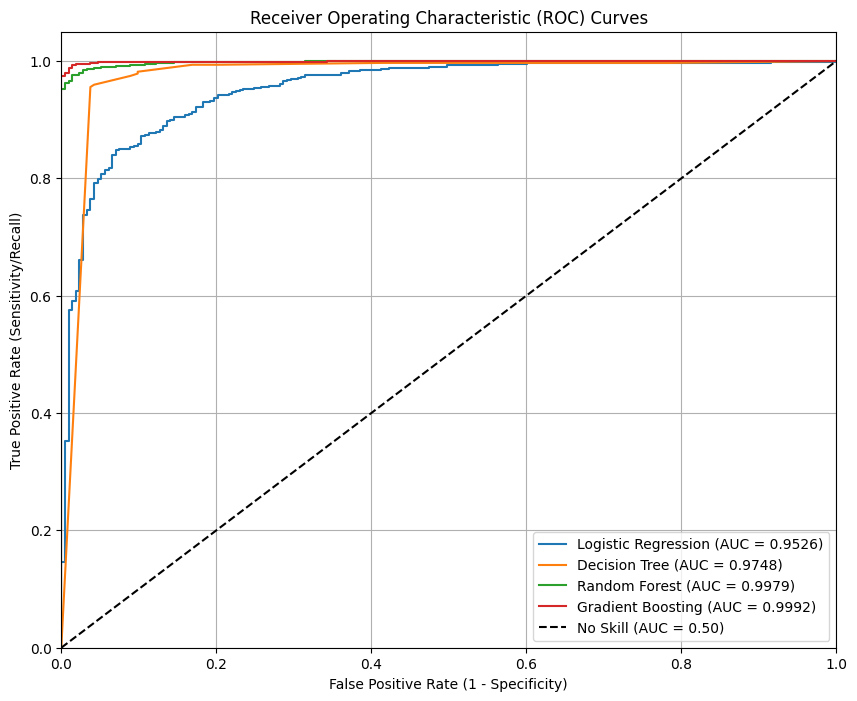


--- Generating Precision-Recall Curves ---


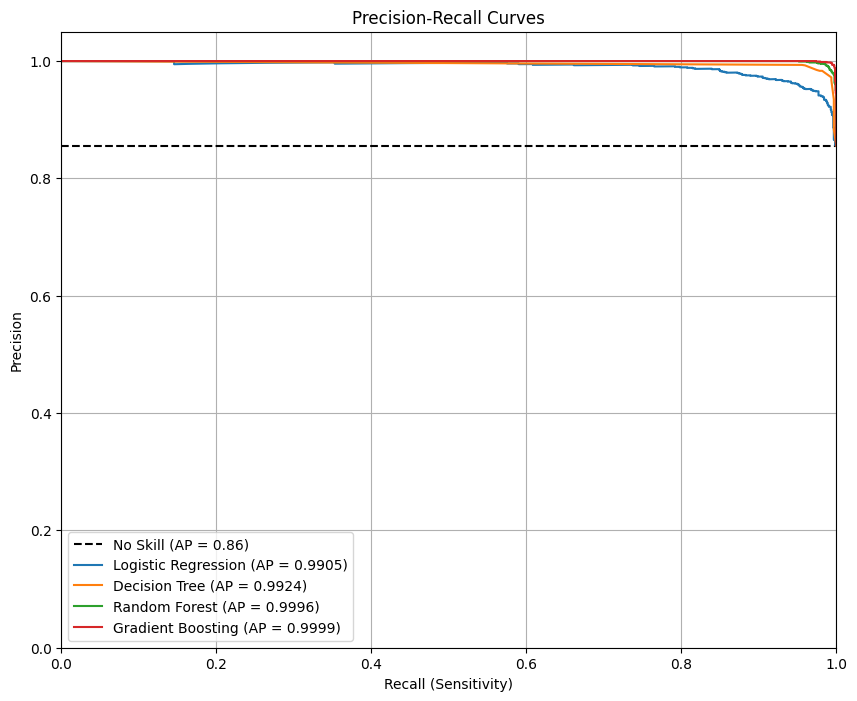

In [ ]:
# Cell 17: Plotting ROC and Precision-Recall Curves

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Ensure all necessary predicted probabilities and true labels are available
# y_test
# y_pred_proba_log_reg
# y_pred_proba_dt
# y_pred_proba_rf
# y_pred_proba_gb

if 'y_test' not in locals() or \
   'y_pred_proba_log_reg' not in locals() or \
   'y_pred_proba_dt' not in locals() or \
   'y_pred_proba_rf' not in locals() or \
   'y_pred_proba_gb' not in locals():
    print("ERROR: Predicted probabilities or y_test not found. Please run model training cells first.")
    # import sys
    # sys.exit()
else:
    print("--- Generating ROC Curves ---")
    plt.figure(figsize=(10, 8))

    # Logistic Regression
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_log_reg)
    roc_auc_lr = auc(fpr_lr, tpr_lr) # or use the roc_auc_score you already calculated
    plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')

    # Decision Tree
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.4f})')

    # Random Forest
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')

    # Gradient Boosting
    fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
    roc_auc_gb = auc(fpr_gb, tpr_gb)
    plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.4f})')

    # Plotting the "no skill" line
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill (AUC = 0.50)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity/Recall)')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    print("\n--- Generating Precision-Recall Curves ---")
    plt.figure(figsize=(10, 8))

    # Calculate the no-skill line for PR curve (proportion of positives)
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], 'k--', label=f'No Skill (AP = {no_skill:.2f})')

    # Logistic Regression
    precision_lr_curve, recall_lr_curve, _ = precision_recall_curve(y_test, y_pred_proba_log_reg)
    ap_lr = average_precision_score(y_test, y_pred_proba_log_reg)
    plt.plot(recall_lr_curve, precision_lr_curve, label=f'Logistic Regression (AP = {ap_lr:.4f})')

    # Decision Tree
    precision_dt_curve, recall_dt_curve, _ = precision_recall_curve(y_test, y_pred_proba_dt)
    ap_dt = average_precision_score(y_test, y_pred_proba_dt)
    plt.plot(recall_dt_curve, precision_dt_curve, label=f'Decision Tree (AP = {ap_dt:.4f})')

    # Random Forest
    precision_rf_curve, recall_rf_curve, _ = precision_recall_curve(y_test, y_pred_proba_rf)
    ap_rf = average_precision_score(y_test, y_pred_proba_rf)
    plt.plot(recall_rf_curve, precision_rf_curve, label=f'Random Forest (AP = {ap_rf:.4f})')

    # Gradient Boosting
    precision_gb_curve, recall_gb_curve, _ = precision_recall_curve(y_test, y_pred_proba_gb)
    ap_gb = average_precision_score(y_test, y_pred_proba_gb)
    plt.plot(recall_gb_curve, precision_gb_curve, label=f'Gradient Boosting (AP = {ap_gb:.4f})')

    plt.xlabel('Recall (Sensitivity)')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves')
    plt.legend(loc="lower left") # Or "best"
    plt.grid(True)
    plt.ylim([0.0, 1.05]) # Precision can go up to 1
    plt.xlim([0.0, 1.0])  # Recall is between 0 and 1
    plt.show()

In [ ]:
# Cell 18: Hyperparameter Tuning for Gradient Boosting using GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd # Ensure X_train, y_train are available

# Assuming X_train and y_train are your unscaled training data from Cell 9
if 'X_train' not in locals() or 'y_train' not in locals():
    print("ERROR: X_train or y_train not defined. Please ensure previous steps are run.")
    # import sys
    # sys.exit()
else:
    print(f"--- Hyperparameter Tuning for Gradient Boosting (on X_train, y_train) ---")
    print(f"X_train shape for tuning: {X_train.shape}, y_train shape for tuning: {y_train.shape}")

    # Define which columns to scale (same as before)
    cols_to_scale_ht = ['SBP', 'DBP', 'HR', 'RR', 'BT', 'SpO2', 'Age', 'GCS', 'TriageScore', 'PulsePressure', 'MAP']
    actual_cols_to_scale_ht = [col for col in cols_to_scale_ht if col in X_train.columns]

    preprocessor_ht = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), actual_cols_to_scale_ht)],
        remainder='passthrough'
    )

    # Create the pipeline
    # We refer to the classifier step as 'classifier' for GridSearchCV to set its params
    pipeline_ht = Pipeline(steps=[('preprocessor', preprocessor_ht),
                                  ('classifier', GradientBoostingClassifier(random_state=42))])

    # Define the parameter grid to search
    # WARNING: A large grid can be VERY time-consuming! Start small.
    param_grid_gb = {
        'classifier__n_estimators': [100, 150], # Number of trees
        'classifier__learning_rate': [0.05, 0.1], # Learning rate
        'classifier__max_depth': [3, 5], # Max depth of individual trees
        # 'classifier__subsample': [0.8, 1.0] # Fraction of samples used for fitting individual base learners
        # 'classifier__min_samples_split': [2, 4]
    }
    # The current best params were n_estimators=100, learning_rate=0.1, max_depth=5
    # We are searching around these values.

    # Setup Stratified K-Fold for cross-validation within GridSearchCV
    cv_skf_ht = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # Using 3 splits for faster grid search

    # Setup GridSearchCV
    # Scoring: 'roc_auc' is good for imbalanced classes. Could also use 'f1_weighted' or 'f1_macro'
    # n_jobs=-1 uses all available cores (can speed things up significantly)
    grid_search_gb = GridSearchCV(estimator=pipeline_ht,
                                  param_grid=param_grid_gb,
                                  cv=cv_skf_ht,
                                  scoring='roc_auc', # Focus on ROC AUC for tuning
                                  verbose=2, # Shows progress
                                  n_jobs=-1)

    print("Starting GridSearchCV for Gradient Boosting...")
    # Fit GridSearchCV on the (unscaled) X_train and y_train
    grid_search_gb.fit(X_train, y_train)

    print("\nGridSearchCV Complete.")
    print(f"Best ROC AUC score from GridSearchCV: {grid_search_gb.best_score_:.4f}")
    print("Best hyperparameters found:")
    print(grid_search_gb.best_params_)

    # Get the best estimator
    best_gb_model_tuned = grid_search_gb.best_estimator_

    # Evaluate the tuned model on the original X_test_scaled, y_test
    # (Note: X_test needs to be preprocessed in the same way the pipeline expects,
    #  but best_estimator_ IS a pipeline, so it handles preprocessing!)
    print("\n--- Evaluating Tuned Gradient Boosting Model on Hold-Out Test Set ---")
    if 'X_test' in locals() and 'y_test' in locals(): # Use unscaled X_test for the pipeline
        y_pred_gb_tuned = best_gb_model_tuned.predict(X_test)
        y_pred_proba_gb_tuned = best_gb_model_tuned.predict_proba(X_test)[:, 1]

        accuracy_gb_tuned = accuracy_score(y_test, y_pred_gb_tuned)
        precision_gb_tuned = precision_score(y_test, y_pred_gb_tuned)
        recall_gb_tuned = recall_score(y_test, y_pred_gb_tuned)
        f1_gb_tuned = f1_score(y_test, y_pred_gb_tuned)
        roc_auc_gb_tuned = roc_auc_score(y_test, y_pred_proba_gb_tuned)

        print(f"Tuned Accuracy: {accuracy_gb_tuned:.4f}")
        print(f"Tuned Precision (Class 1): {precision_gb_tuned:.4f}")
        print(f"Tuned Recall (Class 1): {recall_gb_tuned:.4f}")
        print(f"Tuned F1-Score (Class 1): {f1_gb_tuned:.4f}")
        print(f"Tuned ROC AUC Score: {roc_auc_gb_tuned:.4f}")

        print("\nTuned Classification Report (Gradient Boosting):")
        print(classification_report(y_test, y_pred_gb_tuned))
    else:
        print("X_test or y_test not found for final evaluation of tuned model.")

--- Hyperparameter Tuning for Gradient Boosting (on X_train, y_train) ---
X_train shape for tuning: (4429, 18), y_train shape for tuning: (4429,)
Starting GridSearchCV for Gradient Boosting...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

GridSearchCV Complete.
Best ROC AUC score from GridSearchCV: 0.9969
Best hyperparameters found:
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 150}

--- Evaluating Tuned Gradient Boosting Model on Hold-Out Test Set ---
Tuned Accuracy: 0.9919
Tuned Precision (Class 1): 0.9945
Tuned Recall (Class 1): 0.9960
Tuned F1-Score (Class 1): 0.9953
Tuned ROC AUC Score: 0.9995

Tuned Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       213
           1       0.99      1.00      1.00      1264

    accuracy                           0.99      1477
   macro avg       0.99      0.98      0.98      1477
weighted avg

In [ ]:
# Cell 19: Experiment - Re-including Labs with KNNImputer and Missingness Indicators

# --- Reload original data or use a very early copy ---
# For this experiment, we need to go back to a point BEFORE labs were dropped.
# Let's assume 'df' is your original loaded dataframe.
if 'df' not in locals():
    print("Original dataframe 'df' not found. Please load it again for this experiment.")
    # import sys
    # sys.exit()
else:
    print("--- Experiment: Re-including Lab Features ---")
    df_lab_experiment = df.copy() # Work on a new copy

    lab_cols_highly_missing = ['Urea', 'Creatinine', 'Cl', 'Na', 'K'] # Original list
    # Also check for 'Ceratinine' if that was a typo and present
    if 'Ceratinine' in df_lab_experiment.columns and 'Creatinine' not in df_lab_experiment.columns:
        if 'Ceratinine' not in lab_cols_highly_missing: # Add if it's the actual name
            lab_cols_highly_missing.append('Ceratinine')
            # And ensure 'Creatinine' isn't also in the list if 'Ceratinine' is the true one
            if 'Creatinine' in lab_cols_highly_missing: lab_cols_highly_missing.remove('Creatinine')


    print(f"Lab columns to process: {lab_cols_highly_missing}")

    # 1. Create Missingness Indicators for these labs
    for col in lab_cols_highly_missing:
        if col in df_lab_experiment.columns:
            df_lab_experiment[f'{col}_missing'] = df_lab_experiment[col].isnull().astype(int)
            print(f"Created missing indicator for {col}.")
        else:
            print(f"Warning: Lab column {col} not found in df_lab_experiment for indicator creation.")


    # 2. Impute other missing values (like we did before for TriageScore, Smoke etc.)
    #    This step is crucial BEFORE KNNImputer if those columns are used by KNN.
    #    For simplicity, let's assume these are handled or we focus KNN on a subset.

    # Quick imputation for moderately missing non-lab features before KNN:
    if 'TriageScore' in df_lab_experiment.columns:
         df_lab_experiment['TriageScore'].fillna(df_lab_experiment['TriageScore'].median(), inplace=True)
    for col_mod_miss in ['Smoke', 'Alcoholic', 'FHCD']:
        if col_mod_miss in df_lab_experiment.columns:
            df_lab_experiment[col_mod_miss].fillna(df_lab_experiment[col_mod_miss].mode()[0], inplace=True)
    for col_vitals in ['DBP', 'HR', 'RR', 'SpO2', 'BT']: # SBP was no missing, GCS usually no missing
        if col_vitals in df_lab_experiment.columns:
            df_lab_experiment[col_vitals].fillna(df_lab_experiment[col_vitals].median(), inplace=True)


    # 3. Apply KNNImputer to lab columns (and potentially other numerics if they still have NaNs)
    from sklearn.impute import KNNImputer
    imputer_knn = KNNImputer(n_neighbors=5)

    # Select all numeric columns for KNN imputation.
    # This will impute the labs and any other numeric column that might still have NaNs.
    # Ensure only features intended for the model are included here.
    # Exclude ID and Outcome for imputation.
    cols_for_knn = df_lab_experiment.select_dtypes(include=np.number).columns.tolist()
    if 'ID' in cols_for_knn: cols_for_knn.remove('ID')
    if 'Outcome' in cols_for_knn: cols_for_knn.remove('Outcome')
    # Also exclude the newly created _missing indicator columns from being targets of imputation
    missing_indicator_cols = [col + '_missing' for col in lab_cols_highly_missing if col + '_missing' in df_lab_experiment.columns]
    cols_for_knn = [col for col in cols_for_knn if col not in missing_indicator_cols]


    print(f"\nColumns being passed to KNNImputer: {cols_for_knn}")
    if cols_for_knn: # Ensure there are columns to impute
        df_lab_experiment_numeric_imputed = pd.DataFrame(
            imputer_knn.fit_transform(df_lab_experiment[cols_for_knn]),
            columns=cols_for_knn,
            index=df_lab_experiment.index
        )
        # Update the original dataframe with imputed values
        for col in cols_for_knn:
            df_lab_experiment[col] = df_lab_experiment_numeric_imputed[col]
        print("KNN Imputation applied.")
    else:
        print("No numeric columns found or selected for KNN Imputation.")

    print(f"Missing values in df_lab_experiment after KNN imputation (should be 0 for imputed numeric columns):")
    print(df_lab_experiment[cols_for_knn].isnull().sum())


    # 4. Perform other preprocessing steps (Encoding, other Feature Engineering)
    #    These need to be re-applied to df_lab_experiment
    #    Categorical Encoding for 'Gender' (if it was string originally - it was int, so okay)
    if 'Gender' in df_lab_experiment.columns and df_lab_experiment['Gender'].dtype == 'object':
        df_lab_experiment = pd.get_dummies(df_lab_experiment, columns=['Gender'], prefix='Gender', drop_first=True)

    # Feature Engineering (PulsePressure, MAP, AgeGroup)
    if 'SBP' in df_lab_experiment.columns and 'DBP' in df_lab_experiment.columns:
        df_lab_experiment['PulsePressure'] = df_lab_experiment['SBP'] - df_lab_experiment['DBP']
        df_lab_experiment['MAP'] = (df_lab_experiment['SBP'] + 2 * df_lab_experiment['DBP']) / 3
    if 'Age' in df_lab_experiment.columns:
        min_age_lab = df_lab_experiment['Age'].min()
        max_age_lab = df_lab_experiment['Age'].max()
        age_bins_lab = [min_age_lab - 1, 65, 75, 85, max_age_lab + 1]
        age_labels_lab = ['Age_Under65', 'Age_65-74', 'Age_75-84', 'Age_85+']
        if min_age_lab >= 60:
             age_bins_lab = [min_age_lab-1, 70, 80, max_age_lab + 1]
             age_labels_lab = [f'Age_{int(min_age_lab)}-69', 'Age_70-79', 'Age_80+']
             if len(age_labels_lab) < 2 :
                age_bins_lab = [min_age_lab-1, max_age_lab+1]
                age_labels_lab = [f'Age_{int(min_age_lab)}-{int(max_age_lab)}']

        df_lab_experiment['AgeGroup'] = pd.cut(df_lab_experiment['Age'], bins=age_bins_lab, labels=age_labels_lab, right=False)
        df_lab_experiment = pd.get_dummies(df_lab_experiment, columns=['AgeGroup'], drop_first=True)

    print(f"\nShape of df_lab_experiment after all processing: {df_lab_experiment.shape}")
    print(f"Final check for NaNs in df_lab_experiment (should be very few or zero in features): \n{df_lab_experiment.drop(columns=['Outcome', 'ID'], errors='ignore').isnull().sum().sort_values(ascending=False).head()}")


    # 5. Define X_lab, y_lab and Split
    if 'Outcome' in df_lab_experiment.columns:
        y_lab = df_lab_experiment['Outcome'].copy()
        X_lab_cols_to_drop = ['Outcome']
        if 'ID' in df_lab_experiment.columns: X_lab_cols_to_drop.append('ID')
        X_lab = df_lab_experiment.drop(columns=X_lab_cols_to_drop)

        print(f"X_lab shape: {X_lab.shape}, y_lab shape: {y_lab.shape}")

        # It's crucial to use the SAME random_state for splitting if you want comparable results
        # to your previous non-lab models, though this is a new feature set.
        X_train_lab, X_test_lab, y_train_lab, y_test_lab = train_test_split(
            X_lab, y_lab, test_size=0.25, random_state=42, stratify=y_lab
        )
        print(f"X_train_lab shape: {X_train_lab.shape}, X_test_lab shape: {X_test_lab.shape}")


        # 6. Train and evaluate your best model (e.g., the tuned Gradient Boosting, or the original one)
        #    on this new feature set (X_train_lab, y_train_lab, X_test_lab, y_test_lab)
        #    You'll need to use a pipeline for scaling again.
        print("\n--- Evaluating Best Model (e.g., Tuned GB) on Data with Re-included Labs ---")

        # Redefine cols_to_scale for the new X_train_lab, as it has more columns
        # Basic numeric columns + the newly imputed lab columns
        # Exclude _missing indicators and one-hot encoded AgeGroup from scaling
        original_numeric_cols = ['SBP', 'DBP', 'HR', 'RR', 'BT', 'SpO2', 'Age', 'GCS', 'TriageScore', 'PulsePressure', 'MAP']
        imputed_lab_cols = [col for col in lab_cols_highly_missing if col in X_train_lab.columns] # Actual lab columns, not indicators
        cols_to_scale_lab_exp = [col for col in original_numeric_cols + imputed_lab_cols if col in X_train_lab.columns]
        print(f"Columns to scale for lab experiment: {cols_to_scale_lab_exp}")


        preprocessor_lab_exp = ColumnTransformer(
            transformers=[('num', StandardScaler(), cols_to_scale_lab_exp)],
            remainder='passthrough'
        )

        # Use the best_gb_model_tuned from GridSearchCV, or define a new GB model
        # For simplicity, let's use the original GB configuration
        gb_model_lab_exp = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
        pipeline_lab_exp = Pipeline(steps=[('preprocessor', preprocessor_lab_exp),
                                           ('classifier', gb_model_lab_exp)])

        pipeline_lab_exp.fit(X_train_lab, y_train_lab)
        y_pred_gb_lab = pipeline_lab_exp.predict(X_test_lab)
        y_pred_proba_gb_lab = pipeline_lab_exp.predict_proba(X_test_lab)[:, 1]

        roc_auc_gb_lab = roc_auc_score(y_test_lab, y_pred_proba_gb_lab)
        f1_gb_lab = f1_score(y_test_lab, y_pred_gb_lab)
        print(f"With Re-included Labs - ROC AUC: {roc_auc_gb_lab:.4f}, F1-Score (Class 1): {f1_gb_lab:.4f}")
        print("Classification Report (With Re-included Labs):")
        print(classification_report(y_test_lab, y_pred_gb_lab))
    else:
        print("Experiment with re-included labs could not proceed (Outcome missing or other setup issue).")

--- Experiment: Re-including Lab Features ---
Lab columns to process: ['Urea', 'Cl', 'Na', 'K', 'Ceratinine']
Created missing indicator for Urea.
Created missing indicator for Cl.
Created missing indicator for Na.
Created missing indicator for K.
Created missing indicator for Ceratinine.

Columns being passed to KNNImputer: ['SBP', 'DBP', 'HR', 'RR', 'BT', 'SpO2', 'Age', 'Gender', 'GCS', 'Na', 'K', 'Cl', 'Urea', 'Ceratinine', 'Alcoholic', 'Smoke', 'FHCD', 'TriageScore']


<ipython-input-22-8ba804af0601>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_lab_experiment['TriageScore'].fillna(df_lab_experiment['TriageScore'].median(), inplace=True)
<ipython-input-22-8ba804af0601>:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

KNN Imputation applied.
Missing values in df_lab_experiment after KNN imputation (should be 0 for imputed numeric columns):
SBP            0
DBP            0
HR             0
RR             0
BT             0
SpO2           0
Age            0
Gender         0
GCS            0
Na             0
K              0
Cl             0
Urea           0
Ceratinine     0
Alcoholic      0
Smoke          0
FHCD           0
TriageScore    0
dtype: int64

Shape of df_lab_experiment after all processing: (5906, 30)
Final check for NaNs in df_lab_experiment (should be very few or zero in features): 
SBP    0
DBP    0
HR     0
RR     0
BT     0
dtype: int64
X_lab shape: (5906, 28), y_lab shape: (5906,)
X_train_lab shape: (4429, 28), X_test_lab shape: (1477, 28)

--- Evaluating Best Model (e.g., Tuned GB) on Data with Re-included Labs ---
Columns to scale for lab experiment: ['SBP', 'DBP', 'HR', 'RR', 'BT', 'SpO2', 'Age', 'GCS', 'TriageScore', 'PulsePressure', 'MAP', 'Urea', 'Cl', 'Na', 'K', 'Ceratinine']

In [ ]:
# Cell 20: (Optional but Recommended) Final Training of the Best Model Pipeline (with Labs)
# This is if you want a single 'final_model_pipeline' object for the dashboard

# Assuming X_train_lab, y_train_lab, X_test_lab, y_test_lab are defined from Cell 19
# and pipeline_lab_exp (preprocessor_lab_exp + gb_model_lab_exp) is also defined.

if 'pipeline_lab_exp' in locals() and \
   'X_train_lab' in locals() and 'y_train_lab' in locals() and \
   'X_test_lab' in locals() and 'y_test_lab' in locals():

    print("--- Training Final Best Model Pipeline (GB with Labs) on full X_train_lab ---")
    # This pipeline_lab_exp already contains the untrained GB model configuration
    # and the preprocessor. Fitting it here trains it on the full training set.
    pipeline_lab_exp.fit(X_train_lab, y_train_lab)
    print("Final model pipeline trained.")

    # Quick re-evaluation on X_test_lab to confirm performance
    y_pred_final = pipeline_lab_exp.predict(X_test_lab)
    y_pred_proba_final = pipeline_lab_exp.predict_proba(X_test_lab)[:, 1]

    roc_auc_final = roc_auc_score(y_test_lab, y_pred_proba_final)
    f1_final = f1_score(y_test_lab, y_pred_final)
    print(f"Performance of final model on test set - ROC AUC: {roc_auc_final:.4f}, F1-Score (Class 1): {f1_final:.4f}")
    print("Classification Report (Final Model):")
    print(classification_report(y_test_lab, y_pred_final))

    # You can save this trained pipeline for the dashboard
    import joblib
    joblib.dump(pipeline_lab_exp, 'best_cardiac_prediction_pipeline.pkl')
    print("Trained pipeline saved to 'best_cardiac_prediction_pipeline.pkl'")
else:
    print("Required variables for final model training not found. Please check previous cells.")

--- Training Final Best Model Pipeline (GB with Labs) on full X_train_lab ---
Final model pipeline trained.
Performance of final model on test set - ROC AUC: 0.9994, F1-Score (Class 1): 0.9964
Classification Report (Final Model):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       213
           1       1.00      1.00      1.00      1264

    accuracy                           0.99      1477
   macro avg       0.99      0.99      0.99      1477
weighted avg       0.99      0.99      0.99      1477

Trained pipeline saved to 'best_cardiac_prediction_pipeline.pkl'


In [ ]:
# Assuming X_train_lab is defined from Cell 19
if 'X_train_lab' in locals():
    feature_names_for_app = X_train_lab.columns.tolist()
    print(feature_names_for_app)
    print(f"\nNumber of features: {len(feature_names_for_app)}") # Should be 28
else:
    print("X_train_lab is not defined. Please run Cell 19.")

['SBP', 'DBP', 'HR', 'RR', 'BT', 'SpO2', 'Age', 'Gender', 'GCS', 'Na', 'K', 'Cl', 'Urea', 'Ceratinine', 'Alcoholic', 'Smoke', 'FHCD', 'TriageScore', 'Urea_missing', 'Cl_missing', 'Na_missing', 'K_missing', 'Ceratinine_missing', 'PulsePressure', 'MAP', 'AgeGroup_Age_65-74', 'AgeGroup_Age_75-84', 'AgeGroup_Age_85+']

Number of features: 28



Creating SHAP TreeExplainer...
SHAP TreeExplainer created successfully.
Calculating SHAP values for the test set (can take a moment)...
Attempting SHAP values calculation with additivity check enabled...

Additivity check failed as before: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 4.962736, while the model output was 5.186601. If this difference is acceptable you can set check_additivity=False to disable this check.
Attempting SHAP values calculation with additivity check DISABLED (check_additivity=False).
SHAP values returned for Class 1 (or single output).

SHAP Summary Plot (Global Feature Importance):


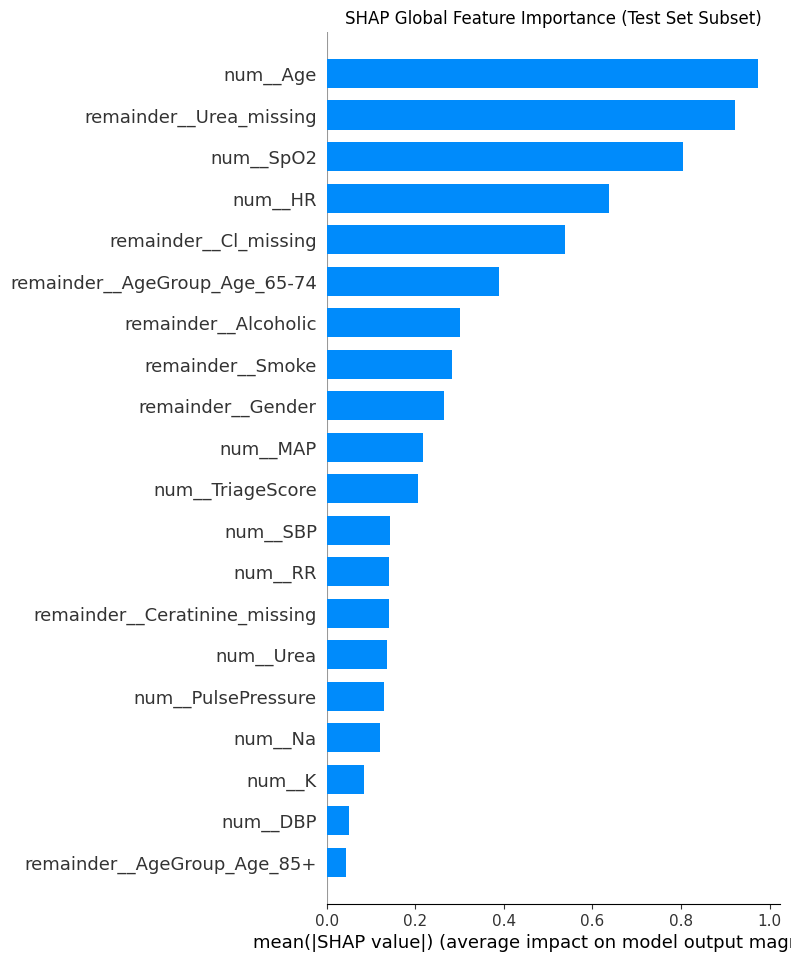

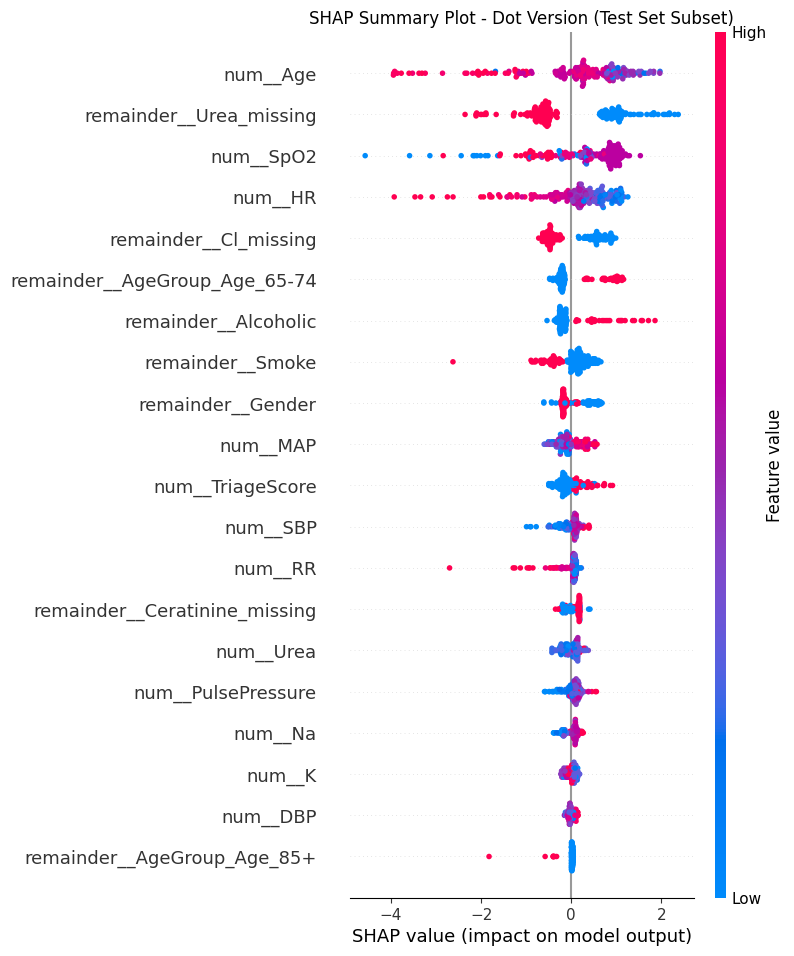


SHAP Dependence Plots for top 5 features (['num__Age', 'remainder__Urea_missing', 'num__SpO2', 'num__HR', 'remainder__Cl_missing']):


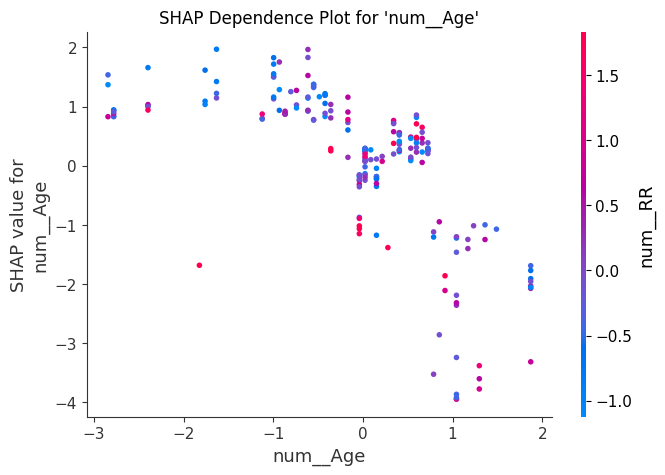

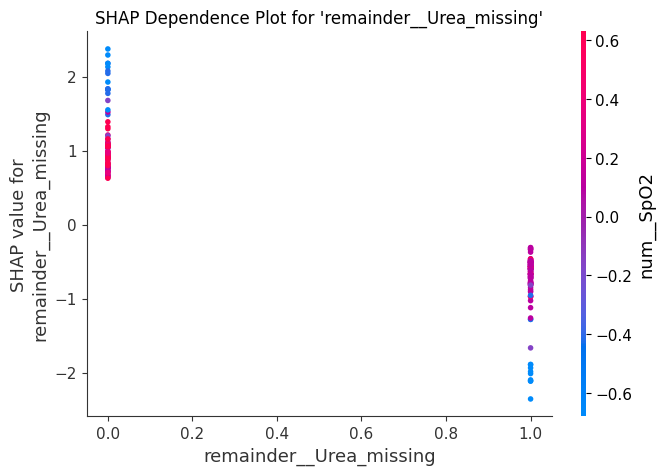

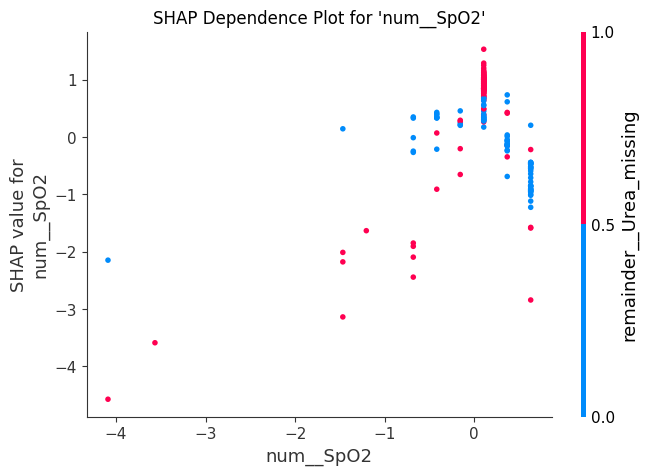

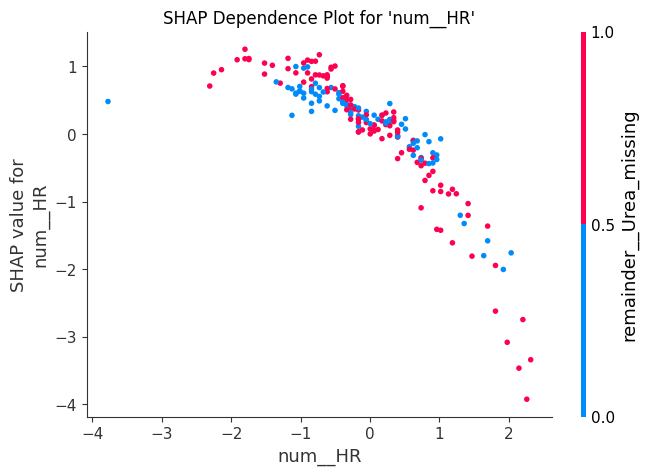

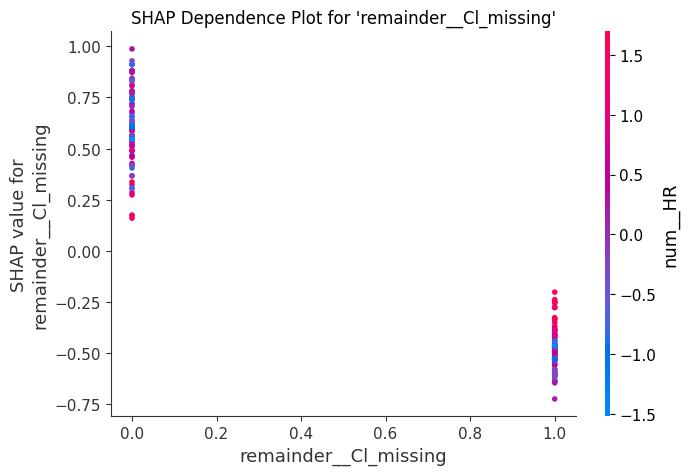


SHAP Force Plot for an individual prediction (explaining one instance):


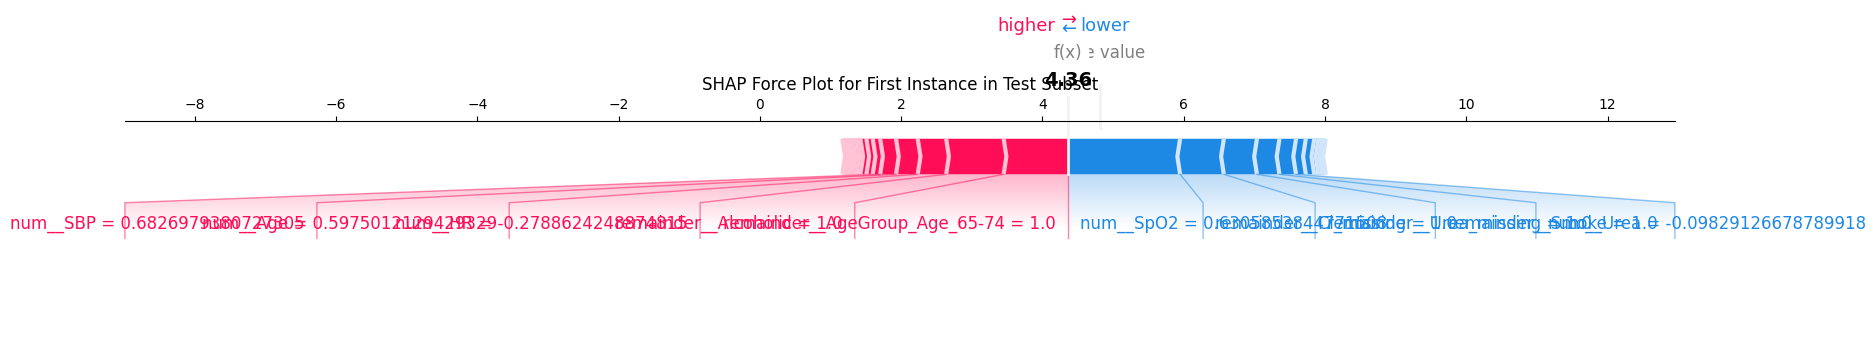

--- SHAP Analysis Complete (in Notebook) ---


In [28]:
# Cell 21: SHAP Analysis - REVISED for Additivity Error

# ... (keep the initial parts for loading pipeline, preprocessing X_train_lab, X_test_lab, getting feature names,
#      and converting X_train_lab_processed_df_shap and X_test_lab_processed_df_shap to float as before) ...
# Make sure these are defined correctly:
# trained_gb_classifier
# X_train_lab_processed_df_shap (all float64)
# X_test_lab_processed_df_shap (all float64)
# processed_feature_names

if 'trained_gb_classifier' not in locals() or \
   'X_train_lab_processed_df_shap' not in locals() or \
   'X_test_lab_processed_df_shap' not in locals():
    print("ERROR: Necessary variables for SHAP not found. Rerun previous parts of the cell.")
else:
    print("\nCreating SHAP TreeExplainer...")
    try:
        # OPTION A: Try without explicitly passing 'data' to TreeExplainer first for sklearn models
        # This uses a default background if data is not given or if model_output="raw" (TreeEnsemble specific).
        # explainer_gb_shap = shap.TreeExplainer(trained_gb_classifier)

        # OPTION B: Explicitly use Independent masker with a sample of training data (often more robust)
        # This tells SHAP to treat features as independent, using X_train data as background.
        masker = shap.maskers.Independent(X_train_lab_processed_df_shap, max_samples=100)
        explainer_gb_shap = shap.TreeExplainer(trained_gb_classifier, masker)

        # OPTION C: Original way (if A and B also fail, you can revert, but add check_additivity later)
        # explainer_gb_shap = shap.TreeExplainer(trained_gb_classifier, data=X_train_lab_processed_df_shap)

        print("SHAP TreeExplainer created successfully.")
    except Exception as e:
        print(f"An unexpected error occurred creating SHAP explainer: {e}")
        # import sys
        # sys.exit() # Stop if explainer can't be created


    # 5. Calculate SHAP values for the test set
    print("Calculating SHAP values for the test set (can take a moment)...")
    subset_size_shap = min(200, X_test_lab_processed_df_shap.shape[0])
    X_test_subset_shap = shap.sample(X_test_lab_processed_df_shap, subset_size_shap, random_state=42)

    try:
        # Try without disabling additivity first
        print("Attempting SHAP values calculation with additivity check enabled...")
        shap_values_gb_test = explainer_gb_shap.shap_values(X_test_subset_shap, check_additivity=True) # Explicitly True
    except shap.utils._exceptions.ExplainerError as e_additivity:
        print(f"\nAdditivity check failed as before: {e_additivity}")
        print("Attempting SHAP values calculation with additivity check DISABLED (check_additivity=False).")
        print("WARNING: If disabling additivity, ensure the discrepancy is understood or acceptable.")
        try:
            shap_values_gb_test = explainer_gb_shap.shap_values(X_test_subset_shap, check_additivity=False)
        except Exception as e_final:
            print(f"Still failed even with check_additivity=False: {e_final}")
            # import sys
            # sys.exit() # Stop if still failing

    if 'shap_values_gb_test' in locals():
        if isinstance(shap_values_gb_test, list) and len(shap_values_gb_test) == 2:
            print("SHAP values returned for both classes. Using values for Class 1.")
            shap_values_for_class1 = shap_values_gb_test[1]
        else:
            print("SHAP values returned for Class 1 (or single output).")
            shap_values_for_class1 = shap_values_gb_test

        # 6. Generate SHAP Plots (rest of the plotting code remains the same)
        print("\nSHAP Summary Plot (Global Feature Importance):")
        shap.summary_plot(shap_values_for_class1, X_test_subset_shap, plot_type="bar", show=False)
        plt.title("SHAP Global Feature Importance (Test Set Subset)")
        plt.show()

        shap.summary_plot(shap_values_for_class1, X_test_subset_shap, show=False)
        plt.title("SHAP Summary Plot - Dot Version (Test Set Subset)")
        plt.show()

        top_n_features_shap = 5
        mean_abs_shap = np.abs(shap_values_for_class1).mean(axis=0)
        # Ensure feature_importances_shap uses the correct feature names from X_test_subset_shap
        feature_importances_shap = pd.Series(mean_abs_shap, index=X_test_subset_shap.columns)
        top_feature_names_shap = feature_importances_shap.sort_values(ascending=False).head(top_n_features_shap).index.tolist()

        print(f"\nSHAP Dependence Plots for top {top_n_features_shap} features ({top_feature_names_shap}):")
        for feature_name in top_feature_names_shap:
            shap.dependence_plot(feature_name, shap_values_for_class1, X_test_subset_shap, interaction_index="auto", show=False)
            plt.title(f"SHAP Dependence Plot for '{feature_name}'")
            plt.show()

        print("\nSHAP Force Plot for an individual prediction (explaining one instance):")
        shap.initjs()
        expected_value_for_plot = explainer_gb_shap.expected_value
        if isinstance(expected_value_for_plot, (list, np.ndarray)) and len(expected_value_for_plot) > 1:
            expected_value_for_plot = expected_value_for_plot[1]

        shap.force_plot(expected_value_for_plot,
                        shap_values_for_class1[0,:],
                        X_test_subset_shap.iloc[0,:],
                        matplotlib=True, show=False)
        plt.title("SHAP Force Plot for First Instance in Test Subset")
        plt.show()

        print("--- SHAP Analysis Complete (in Notebook) ---")
    else:
        print("SHAP values could not be calculated.")